In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('reviews.txt', sep='\t')
data.head()

,Unnamed: 0,Review
0,1,"Absolutely love the value with their ""buy at l..."
1,2,Ordered food from Domino's on North 25th stree...
2,3,Ordered a veggie lover's pizza without onion f...
3,4,Just another good experience with the Domino's...
4,5,"Review for Dominos del Amo bl, Lakewood CA. Ve..."


Dropping unwanted columns

In [ ]:
mydata = data.drop('Unnamed: 0', axis=1)
mydata.head()

,Review
0,"Absolutely love the value with their ""buy at l..."
1,Ordered food from Domino's on North 25th stree...
2,Ordered a veggie lover's pizza without onion f...
3,Just another good experience with the Domino's...
4,"Review for Dominos del Amo bl, Lakewood CA. Ve..."


Step 1: Cleaning the text:
Remove the special characters, numbers from the text

In [ ]:
import re

In [ ]:
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
#apply() method allows you to apply a function along one of the axis of the DataFrame
mydata['Cleaned Reviews'] = mydata['Review'].apply(clean)
mydata.head()

,Review,Cleaned Reviews
0,"Absolutely love the value with their ""buy at l...",Absolutely love the value with their buy at le...
1,Ordered food from Domino's on North 25th stree...,Ordered food from Domino s on North th street ...
2,Ordered a veggie lover's pizza without onion f...,Ordered a veggie lover s pizza without onion f...
3,Just another good experience with the Domino's...,Just another good experience with the Domino s...
4,"Review for Dominos del Amo bl, Lakewood CA. Ve...",Review for Dominos del Amo bl Lakewood CA Very...


Step 2: Tokenization
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

Word Tokenization

In [ ]:
!pip install nltk

                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB 660.6 kB/s eta 0:00:03
     -                                        0.1/1.5 MB 656.4 kB/s eta 0:00:03
     --                                       0.1/1.5 MB 819.2 kB/s eta 0:00:02
     ---                                      0.1/1.5 MB 774.0 kB/s eta 0:00:02
     ----                                     0.2/1.5 MB 748.1 kB/s eta 0:00:02
     -----                                    0.2/1.5 MB 737.3 kB/s eta 0:00:02
     -----                                    0.2/1.5 MB 737.3 kB/s eta 0:00:02
     -----                                    0.2/1.5 MB 625.1 kB/s eta 0:00:03
     ------                                   0.2/1.5 MB 628.1 kB/s eta 0:00:03
     ------                                   0.3/1.5 MB 561.1 kB/s eta 0:00:03
     -------                                  0.3/1.5 MB 567.7 kB/s eta 0:00:03
     --------                                 0.3

The Punkt tokenizer is based on the Punkt algorithm, which is an unsupervised learning algorithm for sentence boundary detection. It has been trained on large corpora and can handle a wide range of text types and languages. The algorithm uses a combination of punctuation patterns, abbreviations, and other linguistic cues to determine sentence boundaries.

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
text="This is an article on sentiment analysis"
# Create a reference variable for Class word_tokenize

tokens= nltk.word_tokenize(text)
tokens

['This', 'is', 'an', 'article', 'on', 'sentiment', 'analysis']

Step 3: Enrichment – POS tagging

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

In [ ]:
from nltk import pos_tag

The averaged_perceptron_tagger is a part of the Natural Language Toolkit (NLTK) library
and refers to a pre-trained part-of-speech (POS) tagger.
It is based on the averaged perceptron algorithm and
is used to assign grammatical tags (such as noun, verb, adjective, etc.) to words in a given text.

The averaged_perceptron_tagger in NLTK is trained on annotated corpora, where each word is labeled
with its  corresponding part of speech. The tagger learns patterns and features from these training examples to make predictions about the POS tags of unseen words.

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [ ]:
pos=nltk.pos_tag(tokens)
pos

[('This', 'DT'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('article', 'NN'),
 ('on', 'IN'),
 ('sentiment', 'NN'),
 ('analysis', 'NN')]

Step 4: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Removing Stop Words

In [ ]:
text="This is an article on Sentiment Analysis"
tokens=nltk.word_tokenize(text)
new_text=(" ").join(ele for ele in tokens if ele.lower() not in nltk.corpus.stopwords.words('english'))
new_text

'article Sentiment Analysis'

Obtaining Stem Words

A stem is a part of a word responsible for its lexical meaning.
The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

Stemming is a process in (NLP) that involves reducing words to their base or root form, known as the stem. The purpose of stemming is to simplify words to their common base form, which helps in reducing the dimensionality of the text data and improving text analysis tasks like information retrieval, search, and sentiment analysis.

Stemming algorithms follow a set of rules or heuristics to remove suffixes or prefixes from words, thereby obtaining the stem. The resulting stem may not always be a valid word or have a dictionary meaning, but it represents the core meaning of the original word.

Original words: "running," "runs," "runner," "ran"

After stemming: "run," "run," "runner," "ran"

In [ ]:
# Stemming
#The Porter stemming algorithm follows a set of steps to transform words by removing suffixes.
#It considers the word's structure and applies rules sequentially until a suffix is
#successfully removed or no further rules can be applied
from nltk.stem import PorterStemmer

In [ ]:
text = "He glanced up from his computer when she came into his office"
# Instantiate PorterStemmer()
stemmer = PorterStemmer()

tokens = nltk.word_tokenize(text)
stem = []
for ele in tokens:
    if ele.lower() not in nltk.corpus.stopwords.words('english'):
        stem.append(stemmer.stem(ele))
stem

['glanc', 'comput', 'came', 'offic']


Lemmatization is the process of reducing words to their base or canonical form, known as the lemma. Unlike stemming, which simply removes affixes from words to obtain a root form, lemmatization takes into account the word's part of speech and applies morphological analysis to derive the lemma. The resulting lemma is a valid word with a dictionary meaning.
Example:"walking," "walks" or "walked the lemma is walk.

In [ ]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import word_tokenize


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...


True

The pos_dict dictionary is used to map the POS (part of speech) tags from the Penn Treebank tagset to the corresponding WordNet POS tags. This mapping is necessary because WordNet uses its own set of POS tags to identify the part of speech of words, while many NLP tools and libraries, including the NLTK (Natural Language Toolkit), often use the Penn Treebank tagset.
The mapping allows for consistent and accurate lemmatization using WordNet.

In [ ]:
# Lemmatization
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

#Instantiate WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

lemma = []
pos = pos_tag(word_tokenize(text))
for ele, tag in pos:
    tag = pos_dict.get(tag[0])
    if ele.lower() not in nltk.corpus.stopwords.words('english'):
        if not tag:
            lemma.append(ele)
        else:
            lemma.append(wordnet_lemmatizer.lemmatize(ele, tag))
lemma
#He glanced up from his computer when she came into his office

['glance', 'computer', 'come', 'office']

Tokenization, POS tagging, Stopwords removal on reviews.txt



In [ ]:
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(nltk.corpus.stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

mydata['POS tagged'] = mydata['Cleaned Reviews'].apply(token_stop_pos)
mydata.head()

,Review,Cleaned Reviews,POS tagged
0,"Absolutely love the value with their ""buy at l...",Absolutely love the value with their buy at le...,"[(Absolutely, r), (love, None), (value, n), (b..."
1,Ordered food from Domino's on North 25th stree...,Ordered food from Domino s on North th street ...,"[(Ordered, v), (food, n), (Domino, n), (North,..."
2,Ordered a veggie lover's pizza without onion f...,Ordered a veggie lover s pizza without onion f...,"[(Ordered, v), (veggie, n), (lover, n), (pizza..."
3,Just another good experience with the Domino's...,Just another good experience with the Domino s...,"[(another, None), (good, a), (experience, n), ..."
4,"Review for Dominos del Amo bl, Lakewood CA. Ve...",Review for Dominos del Amo bl Lakewood CA Very...,"[(Review, n), (Dominos, n), (del, None), (Amo,..."


Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

mydata['Lemma'] = mydata['POS tagged'].apply(lemmatize)
mydata.head()

,Review,Cleaned Reviews,POS tagged,Lemma
0,"Absolutely love the value with their ""buy at l...",Absolutely love the value with their buy at le...,"[(Absolutely, r), (love, None), (value, n), (b...",Absolutely love value buy least two deal go ...
1,Ordered food from Domino's on North 25th stree...,Ordered food from Domino s on North th street ...,"[(Ordered, v), (food, n), (Domino, n), (North,...",Ordered food Domino North th street Derick t...
2,Ordered a veggie lover's pizza without onion f...,Ordered a veggie lover s pizza without onion f...,"[(Ordered, v), (veggie, n), (lover, n), (pizza...",Ordered veggie lover pizza without onion loc...
3,Just another good experience with the Domino's...,Just another good experience with the Domino s...,"[(another, None), (good, a), (experience, n), ...",another good experience Domino Pizza store K...
4,"Review for Dominos del Amo bl, Lakewood CA. Ve...",Review for Dominos del Amo bl Lakewood CA Very...,"[(Review, n), (Dominos, n), (del, None), (Amo,...",Review Dominos del Amo bl Lakewood CA highly...


Sentiment Analysis using TextBlob:

TextBlob is a Python library for processing textual data. It provides a consistent API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, and more.

TextBlob(text).sentiment gives us the Polarity, Subjectivity values.
Polarity ranges from -1 to 1 (1 is more positive, 0 is neutral, -1 is more negative)
Subjectivity ranges from 0 to 1(0 being very objective and 1 being very subjective)

In [ ]:
!pip install TextBlob

                                              0.0/636.8 kB ? eta -:--:--
                                              0.0/636.8 kB ? eta -:--:--
     -                                     30.7/636.8 kB 660.6 kB/s eta 0:00:01
     --                                    41.0/636.8 kB 393.8 kB/s eta 0:00:02
     ----                                  81.9/636.8 kB 573.4 kB/s eta 0:00:01
     ------                               112.6/636.8 kB 598.8 kB/s eta 0:00:01
     ------                               122.9/636.8 kB 516.7 kB/s eta 0:00:01
     --------                             143.4/636.8 kB 532.5 kB/s eta 0:00:01
     ---------                            174.1/636.8 kB 553.5 kB/s eta 0:00:01
     -----------                          204.8/636.8 kB 541.9 kB/s eta 0:00:01
     -------------                        245.8/636.8 kB 580.1 kB/s eta 0:00:01
     --------------                       256.0/636.8 kB 542.5 kB/s eta 0:00:01
     ----------------                     286.7/636.8 

In [ ]:
from textblob import TextBlob

# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
fin_data = pd.DataFrame(mydata[['Review', 'Lemma']])

In [ ]:
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity)
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity)
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,Review,Lemma,Polarity,Analysis
0,"Absolutely love the value with their ""buy at l...",Absolutely love value buy least two deal go ...,0.388889,Positive
1,Ordered food from Domino's on North 25th stree...,Ordered food Domino North th street Derick t...,0.316667,Positive
2,Ordered a veggie lover's pizza without onion f...,Ordered veggie lover pizza without onion loc...,0.146627,Positive
3,Just another good experience with the Domino's...,another good experience Domino Pizza store K...,0.233333,Positive
4,"Review for Dominos del Amo bl, Lakewood CA. Ve...",Review Dominos del Amo bl Lakewood CA highly...,0.373500,Positive


In [ ]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts

Analysis
Negative    64
Positive    58
Neutral      8
Name: count, dtype: int64

In [ ]:
!pip install matplotlib

                                              0.0/7.6 MB ? eta -:--:--
                                              0.0/7.6 MB 660.6 kB/s eta 0:00:12
                                              0.0/7.6 MB 660.6 kB/s eta 0:00:12
                                              0.1/7.6 MB 655.4 kB/s eta 0:00:12
                                              0.1/7.6 MB 731.4 kB/s eta 0:00:11
                                              0.2/7.6 MB 657.6 kB/s eta 0:00:12
     -                                        0.2/7.6 MB 850.1 kB/s eta 0:00:09
     -                                        0.3/7.6 MB 896.4 kB/s eta 0:00:09
     -                                        0.3/7.6 MB 827.2 kB/s eta 0:00:09
     -                                        0.3/7.6 MB 827.2 kB/s eta 0:00:09
     -                                        0.3/7.6 MB 678.1 kB/s eta 0:00:11
     -                                        0.3/7.6 MB 678.1 kB/s eta 0:00:11
     --                                       0.4

([<matplotlib.patches.Wedge at 0x20a3bc77490>,
 [Text(0.02658011817575533, 1.0996788155264987, 'Negative'),
  Text(-0.23736260252046337, -1.0740851897892982, 'Positive'),
  Text(1.3248496763125257, -0.2593710376557031, 'Neutral')],
 [Text(0.014498246277684724, 0.5998248084689992, '49.2%'),
  Text(-0.1294705104657073, -0.5858646489759808, '44.6%'),
  Text(0.8341646110115901, -0.16330769037581302, '6.2%')])

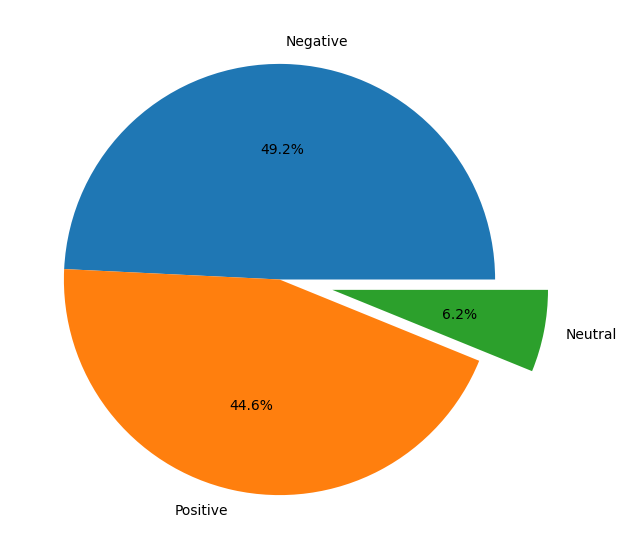

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
# plt.legend()